In [153]:
#Import des outils nécessaires pour le data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Motivation et Problématique

Lors de ces dernières semaines, le projet de loi immigration à fait parler de lui. Si le projet à été refusé aux premiers abord par l'assemblée nationale, il fut accepté après le rajout de certaines clauses en comité mixte paritaire pour séduire certains représentants du Rassemblement national et du parti Les Républicains. 

Marine le Pen décrit cela comme une victoire idéologique de son parti et cela me fit réfléchir à certains arguments anti-immigration qui furent avancés. 
«L'immigration est le carburant de l'insécurité», a déclaré ce mardi sur CNEWS Julien Odoul, député de l'Yonne et porte-parole du Rassemblement national. Invité de la Matinale de CNEWS, le mardi 26 décembre 2023.

Je me suis alors dit qu'il serait intéréssant de voir comment le crime et les délits avaient évolués en France ces dernières années et comment l'immigration affectait ces derniers.

# Sources
En recherchant sur internet j'ai découvert que l'INSEE publiait des rapports relativements réguliers sur ces faits. 

In [83]:
data_menaces = pd.read_csv('projet big data/Menaces.csv', sep=';')
data_injures = pd.read_csv('projet big data/Injures.csv', sep=";")
data_LGBT = pd.read_csv('projet big data/Atteintes anti LGBT.csv', sep=';')
data_racisme = pd.read_csv('projet big data/Atteintes à caractère raciste, xénophobe ou antireligieux.csv', sep=';')
data_escrocs = pd.read_csv('projet big data/Escroqueries et autres infractions assimilées.csv', sep=';')
data_vandalisme = pd.read_csv('projet big data/Actes de vandalisme.csv', sep=';')
data_outrage = pd.read_csv("projet big data/Outrages et violences contre dépositaires de l'autorité publique.csv", sep=';')
data_insecurite_ville = pd.read_csv("projet big data/Sentiment_ville.csv", sep=';')
data_insecurite_sortir =  pd.read_csv("projet big data/Sentiment_sortir.csv", sep=';')
data_insecurite_home = pd.read_csv("projet big data/Sentiment d'insécurité.csv", sep=';')
data_vols = pd.read_csv('projet big data/Vols avec violence.csv', sep=';')
data_violences_sexuelles = pd.read_csv('projet big data/Violences sexuelles.csv', sep=';')
data_conjugales = pd.read_csv('projet big data/Violences conjugales.csv', sep=";")
data_violence_nonconjugales = pd.read_csv('projet big data/Violences physiques.csv', sep=";")
data_stup = pd.read_csv('projet big data/Stup.csv', sep=';')
data_cambu = pd.read_csv('projet big data/Cambriolages.csv', sep=';')
data_corruption = pd.read_csv('projet big data/Corruption.csv', sep=';')
data_homi2015 = pd.read_csv('projet big data/Homicides_avant2015.csv', sep=';')
data_homi2016 = pd.read_csv('projet big data/Homicides_après2016.csv', sep=';')


In [84]:
# Enlève les lignes contenant T
data_violences_sexuelles = data_violences_sexuelles[~data_violences_sexuelles['Unité de temps'].str.contains('T')]
data_homi2015 = data_homi2015[data_homi2015['Correction'] != 'Hors attentats terroristes']
data_homi2016 = data_homi2016[data_homi2016['Correction'] != 'Hors attentats terroristes']

# Combine les années pour les homicides
data_homi_all = pd.concat([data_homi2015, data_homi2016], ignore_index=True)



# Modélisation des Crimes et délits
## Etat des lieux en 2020

J'ai tout d'abord voulu créer un "pie chart" modélisant les crimes dont j'avais obtenu les données. J'ai décidé de ne considérer que les données qui relevaient d'atteintes à la personne et a l'intégrité, mes données ne sont pas exhaustives. Etant donné qu'il y a un nombre très important de catégories, j'ai du choisir quels jeux de données j'utiliserai (par souci d'espace et de temps). Il n'y a donc pas les données sur les délits routiers, ni sur les cambriolages par exemple.

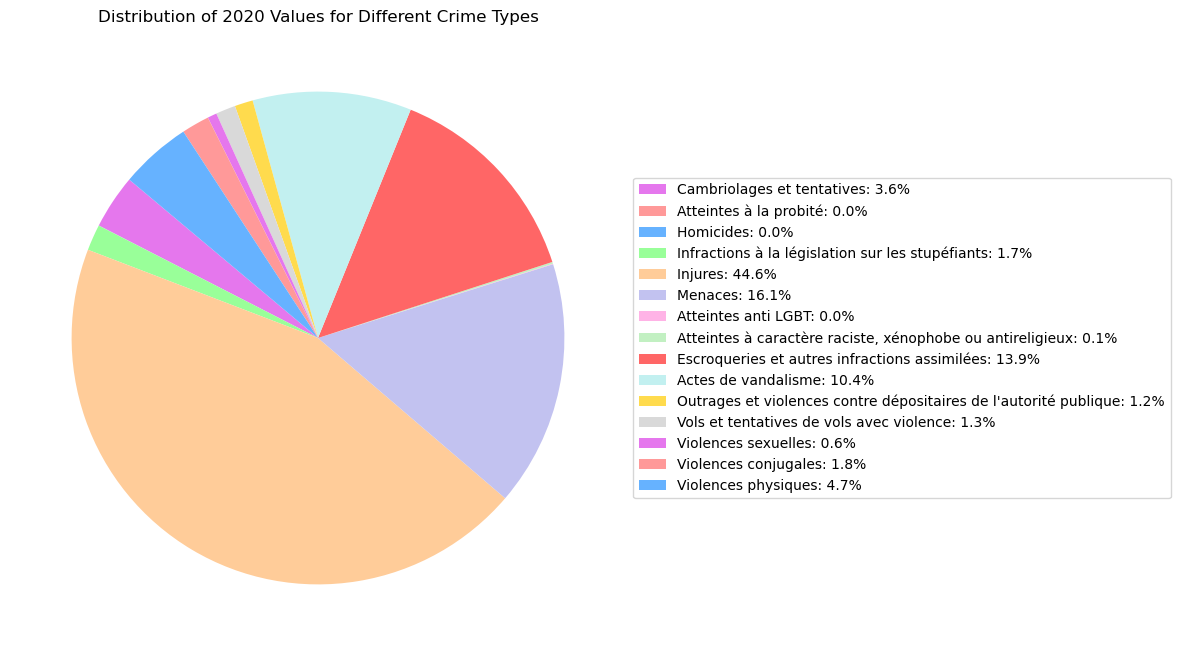

In [154]:
all_crime_dataframes = [data_cambu, data_corruption, data_homi_all, data_stup,data_injures, data_menaces, data_LGBT, data_racisme, data_escrocs, data_vandalisme, data_outrage, data_vols, data_violences_sexuelles, data_conjugales, data_violence_nonconjugales]

# On extrait les données de 2020
values_2020 = {df['Indicateurs'].iloc[0]: df.loc[(df['Unité de temps'] == 2020) | (df['Unité de temps'] == '2020'), 'Valeurs'].values[0] for df in all_crime_dataframes}

total = sum(values_2020.values())
percentages = {label: (value / total) * 100 for label, value in values_2020.items()}


custom_colors = ['#E577ED','#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#c2c2f0', '#ffb3e6', '#c2f0c2', '#ff6666', '#c2f0f0', '#ffdb4d', '#d9d9d9']

# Création de la pie chart
plt.figure(figsize=(10, 8))
plt.pie(values_2020.values(), labels=None, startangle=140, colors=custom_colors)

# Légende
legend_labels = [f'{label}: {percentages[label]:.1f}%' for label in values_2020.keys()]
plt.legend(legend_labels, loc="center left", bbox_to_anchor=(1, 0.5))

plt.title('Distribution of 2020 Values for Different Crime Types')
plt.show()


Il est très clair que la vaste majorité des valeurs sont dans les catégories injures et menaces. 
Selon la directrice de recherche au CNRS et responsable de l'Observatoire scientifique du crime et de la justice, Renée Zauberman: 
"On voit émerger une proportion importante de ce qu'on appelle les violences sans contact, c'est-à-dire les injures, les menaces, les regards de travers." 
"14 à 16% des personnes interrogées disent avoir été victimes de ce genre d'agressions, alors que les violences physiques sérieuses et graves ne sont signalées que par 0,10 à 0,25% des sondés"

# Modélisation des catégories à valeurs élevées

Puisque les ordres de grandeur des différentes catégories ne sont pas comparables sur un seul graphique, j'ai séparé l'analyse en segments partitionés par l'ordre de grandeur.

On pourrait penser que les catégories les plus fortes contribuent le plus au sentiment d'insécurité. Mais ce n'est pas tout à fait clair. En effet, certaines catégories très présentes (escroqueries par ex) ne vont pas forcément influer sur ce sentiment tandis que d'autres bine moins fréquentes (agressions sexuelle, homicide, ...) y contribueront très fortement.

In [86]:
#Commençons par visualiser les données dont l'ordre de grandeur est  très important
crime_dataframes = [data_menaces, dat
                    a_escrocs, data_vandalisme, data_violence_nonconjugales, data_vols, data_injures]


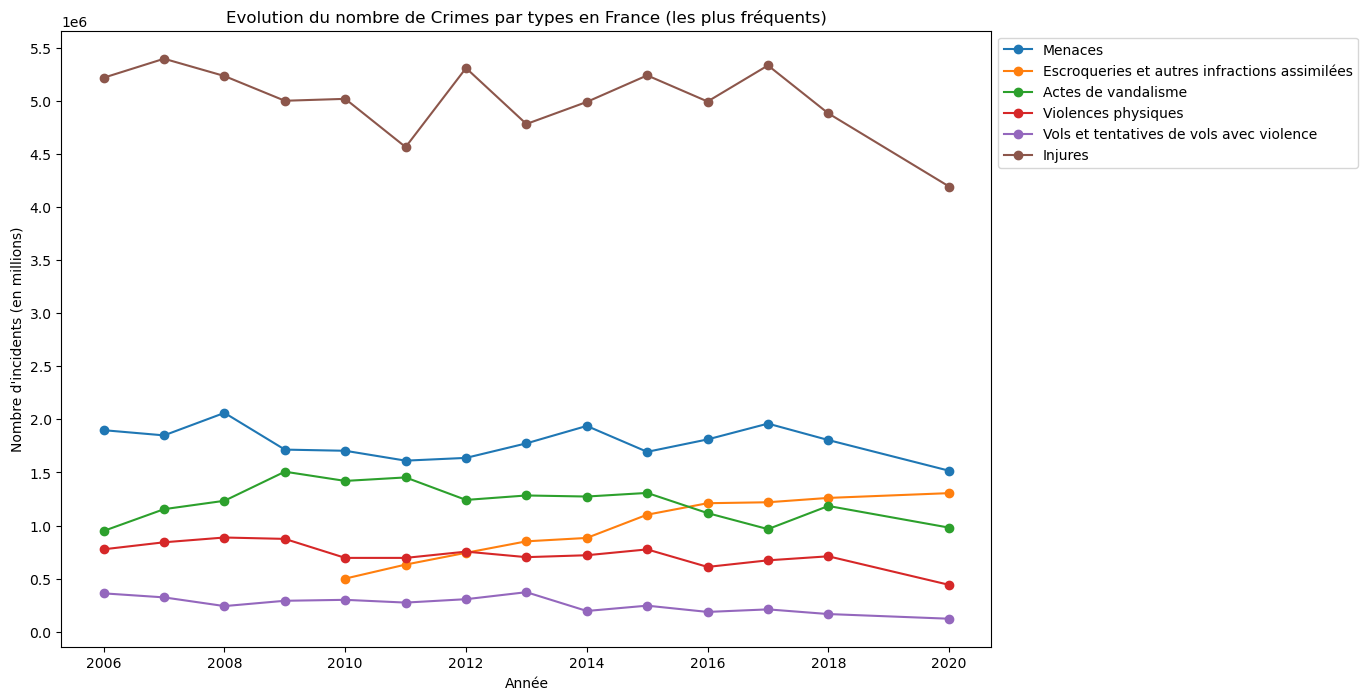

In [155]:
fig, ax = plt.subplots(figsize=(12, 8))

for df in crime_dataframes:
    label = df['Indicateurs'].iloc[0]  # On se sert du type de crime comme label
    df['Unité de temps'] = pd.to_numeric(df['Unité de temps'], errors='coerce')
    
    # Drop rows with NaN values in 'Valeurs' column
    df = df.dropna(subset=['Valeurs'])
    
    ax.plot(df['Unité de temps'], df['Valeurs'], label=label, marker='o')

ax.set_title('Evolution du nombre de Crimes par types en France (les plus fréquents)')
ax.set_xlabel('Année')
ax.set_ylabel("Nombre d'incidents (en millions)")


y_ticks = range(0, int(max(df['Valeurs'])) + 500000, 500000)
ax.set_yticks(y_ticks)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


In [107]:
#Bien que les escroqueries soient en hausse constante, la proportion de plaintes est en diminution drastique.
plaintes_escroc = pd.read_csv("projet big data/Plaintes_escroc.csv",sep=";")

plaintes_escroc['Unité de temps'] = pd.to_numeric(plaintes_escroc['Unité de temps'], errors='coerce')
#Interpolation linéaire pour remplir les valeurs pour l'année 2019
plaintes_escroc = plaintes_escroc.interpolate(method='linear', axis=0)


On remarque que pour les crimes/délits les plus courants, la tendance est à la baisse ou stagnante excepté pour les escroqueries.
La raison de cette évolution du nombre d'escroqueries n'est pas évidente. 
Cependant, une hypothèse est la démocratisation des réseaux sociaux ainsi que le dévelopement de nouvelles technologies (meilleures contrefaçons, usurpation de numéro de téléphone).

Cette évolution est également intéressante du fait que le rapport  (plaintes déposée)/(victimes déclarée) à fortement baissé:

Le nombre de plaintes à possiblement diminué de par le fait que les assurances sont plus propices à rembourser une escroquerie sans dépot de plainte. Mais ce n'est qu'une interprétation. 

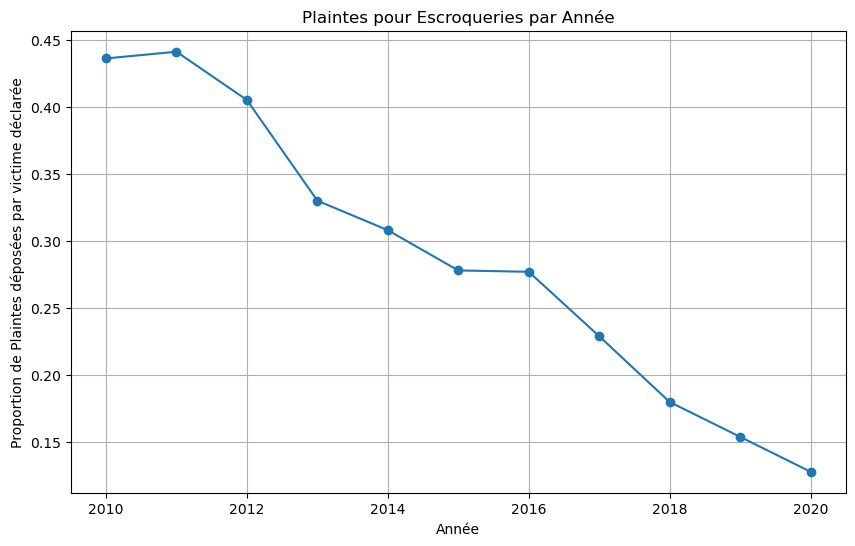

In [89]:
plt.figure(figsize=(10, 6))
plt.plot(plaintes_escroc['Unité de temps'], plaintes_escroc['Valeurs'], marker='o', linestyle='-')
plt.title('Plaintes pour Escroqueries par Année')
plt.xlabel('Année')
plt.ylabel('Proportion de Plaintes déposées par victime déclarée')
plt.grid(True)
plt.show()

## Evolution de 2006 à 2020

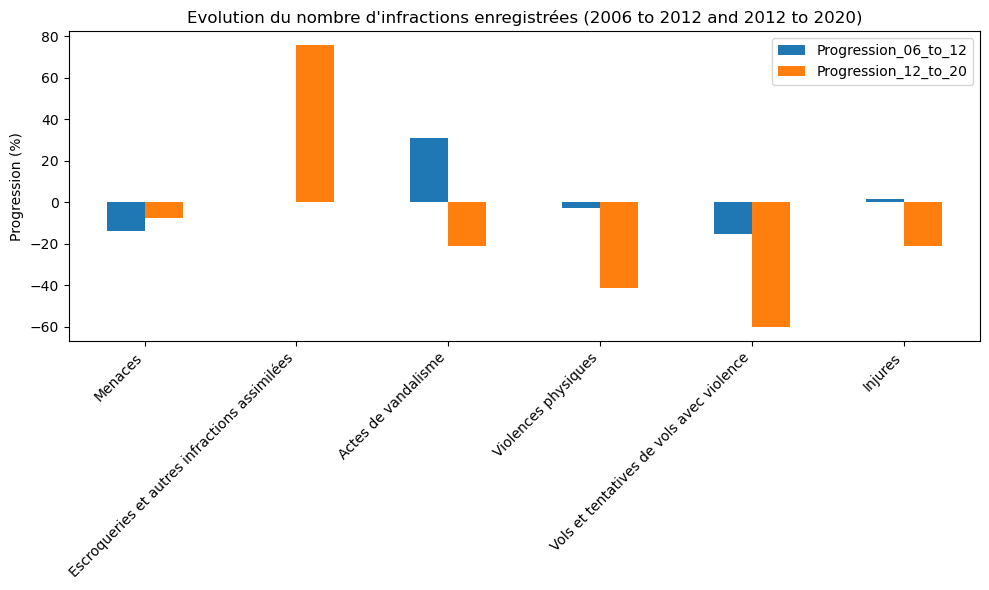

In [113]:
values_dict = {df['Indicateurs'].iloc[0]: {
    2006: df.loc[df['Unité de temps'] == 2006, 'Valeurs'].values[0] if not df.loc[df['Unité de temps'] == 2006].empty else None,
    2012: df.loc[df['Unité de temps'] == 2012, 'Valeurs'].values[0] if not df.loc[df['Unité de temps'] == 2012].empty else None,
    2020: df.loc[df['Unité de temps'] == 2020, 'Valeurs'].values[0] if not df.loc[df['Unité de temps'] == 2020].empty else None
} for df in crime_dataframes}

values_df = pd.DataFrame(values_dict).transpose()

#On veut voir la progression dans le temps du nombre de crimes recensés
values_df['Progression_06_to_12'] = ((values_df[2012] - values_df[2006]) / values_df[2006]) * 100
values_df['Progression_12_to_20'] = ((values_df[2020] - values_df[2012]) / values_df[2012]) * 100


# Représentation graphique de cette évolution
fig, ax = plt.subplots(figsize=(10, 6))
values_df[['Progression_06_to_12', 'Progression_12_to_20']].plot(kind='bar', ax=ax)
ax.set_ylabel('Progression (%)')
ax.set_title("Evolution du nombre d'infractions enregistrées (2006 to 2012 and 2012 to 2020)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

On remarque une diminution générale des crimes les plus fréquents en france sur la période 2006-2020. 
En valeurs absolue cela représente un nombre d'infraction en nette diminution.

# Modélisation des catégories à valeurs moyennement élevées



In [91]:
crime2_dataframes = [data_stup,data_outrage, data_violences_sexuelles, data_conjugales]


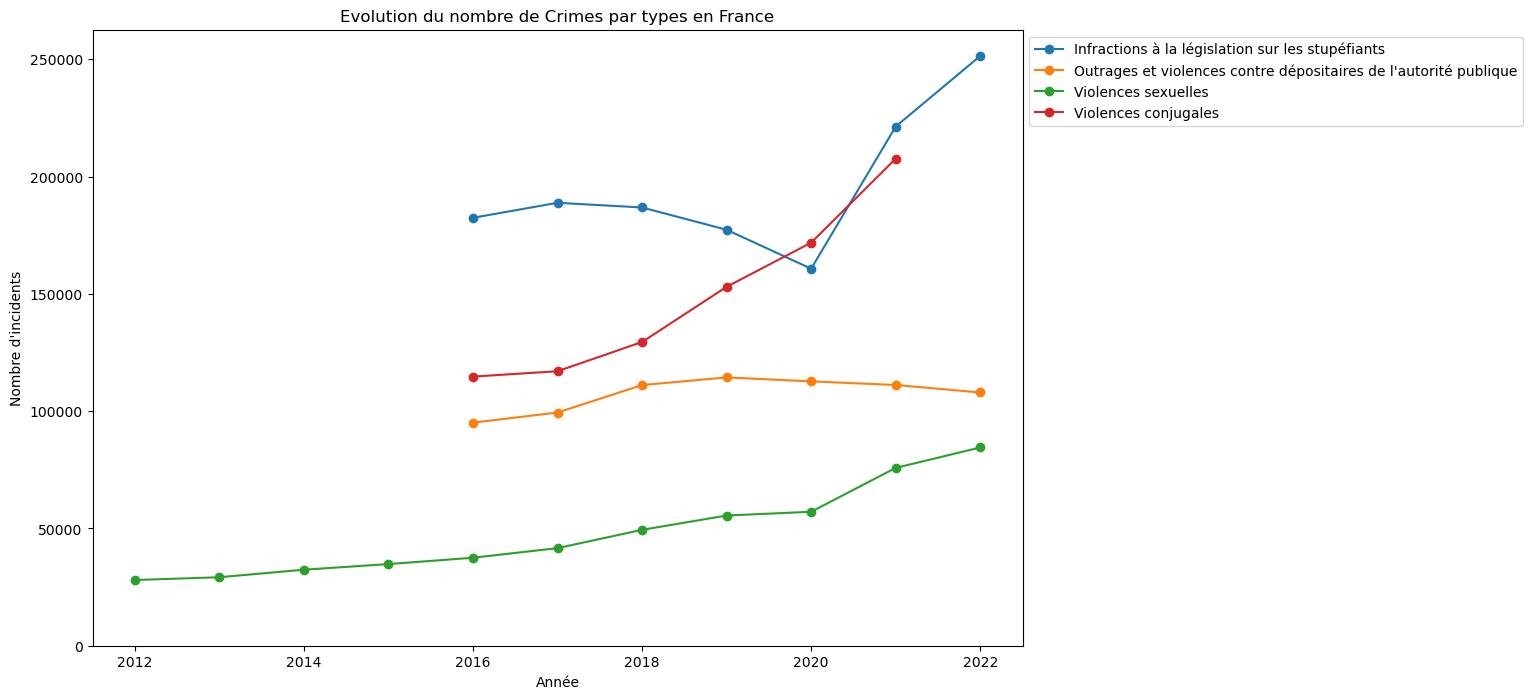

In [161]:
fig, ax = plt.subplots(figsize=(12, 8))

for df in crime2_dataframes:

    label = df['Indicateurs'].iloc[0]  # On se sert du type de crime comme label
    df['Unité de temps'] = pd.to_numeric(df['Unité de temps'], errors='coerce')
    
    # On enlève les colonnes nulles
    df = df.dropna(subset=['Valeurs'])
    
    ax.plot(df['Unité de temps'], df['Valeurs'], label=label, marker='o')

ax.set_title('Evolution du nombre de Crimes par types en France')
ax.set_xlabel('Année')
ax.set_ylabel("Nombre d'incidents")

y_ticks = range(0, int(max(df['Valeurs'])) + 50000, 50000)
ax.set_yticks(y_ticks)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))


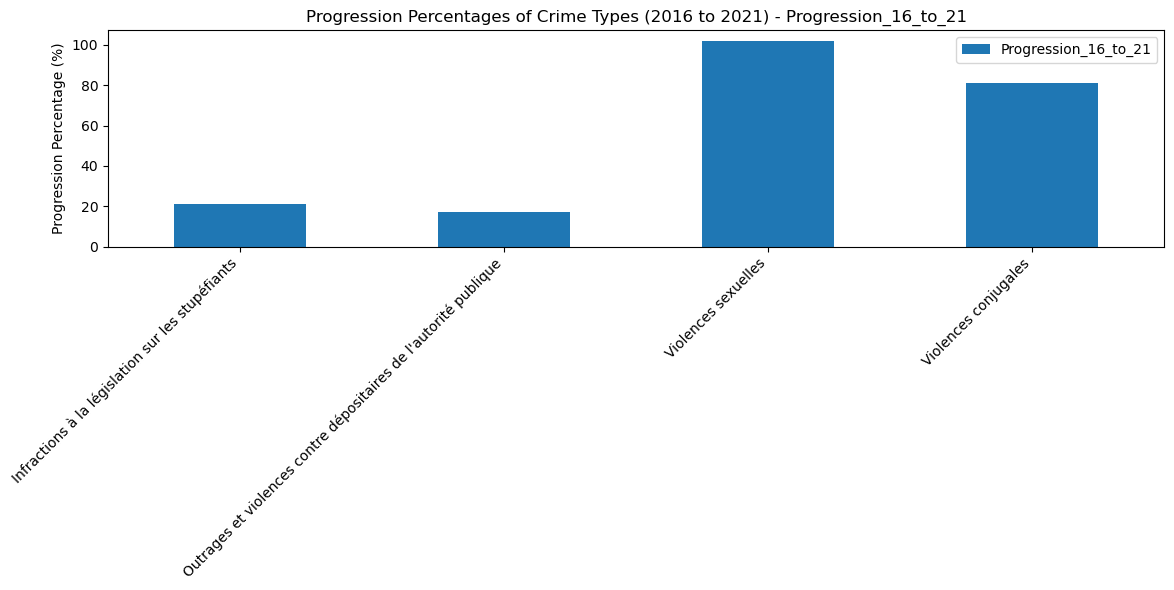

In [162]:
import pandas as pd
import matplotlib.pyplot as plt


values_dict = {df['Indicateurs'].iloc[0]: {
    2016: df.loc[(df['Unité de temps'] == 2016) | (df['Unité de temps'] == '2016'), 'Valeurs'].values[0]
              if not df.loc[(df['Unité de temps'] == 2016) | (df['Unité de temps'] == '2016')].empty else None,
    2021: df.loc[(df['Unité de temps'] == 2021) | (df['Unité de temps'] == '2021'), 'Valeurs'].values[0]
              if not df.loc[(df['Unité de temps'] == 2021) | (df['Unité de temps'] == '2021')].empty else None
} for df in crime2_dataframes}


values_df = pd.DataFrame(values_dict).transpose()

values_df = values_df.apply(pd.to_numeric, errors='coerce')

# Interpolation linéaire des valeurs manquantes
values_df = values_df.interpolate(method='linear', axis=1, limit_area='inside')

# On veut voir la progression dans le temps du nombre de crimes recensés
values_df['Progression_16_to_21'] = ((values_df[2021] - values_df[2016]) / values_df[2016]) * 100



# Représentation graphique de cette évolution
fig, ax = plt.subplots(figsize=(12, 6))
column_name = 'Progression_16_to_21'  # Corrected column name
values_df[[column_name]].plot(kind='bar', ax=ax)  
ax.set_ylabel('Progression Percentage (%)')
ax.set_title(f'Progression Percentages of Crime Types (2016 to 2021) - {column_name}')



plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


On remarque plusieurs choses ici : 

Premièrement le nombre de violences sexuelles enregistrées à été multiplié par 4 sur 10 ans. 
Cela peut fortement participer à ce fameux sentiment d'insécurité. 


On remarque par ailleurs que le gouvernement ne met pas a disposition l'évolution du nombre de plaintes pour  les violences sexuelles.

Donc les chiffres ne représentent pas forcément l'ampleur de cette catégorie d'infractions. 

De plus, cette évolution n'est peut être que le résultat d'une avancée sociétale, les droits dese femmes ayant progréssé, la parole se libère, c'est ce qu'on à pu observer à partir du mouvement ME TOO. Cela peut vouloir dire que le nombre d'infractions n'a pas augmenté mais que les femmes sont plus encline à faire valoir leur droits et à déposer une plainte.

Mais cet argument ne veut pas dire que la situation est forcément meilleure.
Selon le collectif nous toutes, près de 50% des femmes ayant porté plaintes pour violences au sein du couple/agression sexuelle ont été refusées et/ou ont été découragées de le faire.

https://www.noustoutes.org/ressources/resultats_enquete_prendsmaplainte.pdf

Le haut conseil à l'égalité publie un rapport en 2018: https://www.haut-conseil-egalite.gouv.fr/IMG/pdf/rapport-ou_est_argent-vf.pdf

Selon ce dernier, le besoin financier minimum pour une prise en charge de qualité des femmes victimes de violences conjugales a ainsi été estimé à environ 506 millions d’euros, alors que les ressources mobilisées actuellement atteignent environ 79 millions d’euros.




Deuxième remarque: Les mis en cause pour usage de stupéfiants chutent en 2020 (COVID) mais augmentent ensuite.
On pourrait penser qu'il s'agit d'un hausse de l'utilisation de stupéfiants mais cela n'a pas de raison d'être.
En se renseignant on se rend compte que L'amende forfaitaire pour consommation de stupéfiants, et notamment de cannabis, est entrée en vigueur le 1er septembre 2020.
Cela à très probablement fait bondir le nombre d'infrations enregistrées car elle permet à un agent de police de verbaliser un individu sans procédure judiciaire.

## Modélisation des catégories à valeurs faibles


In [96]:
crime3_dataframes = [ data_LGBT, data_racisme]

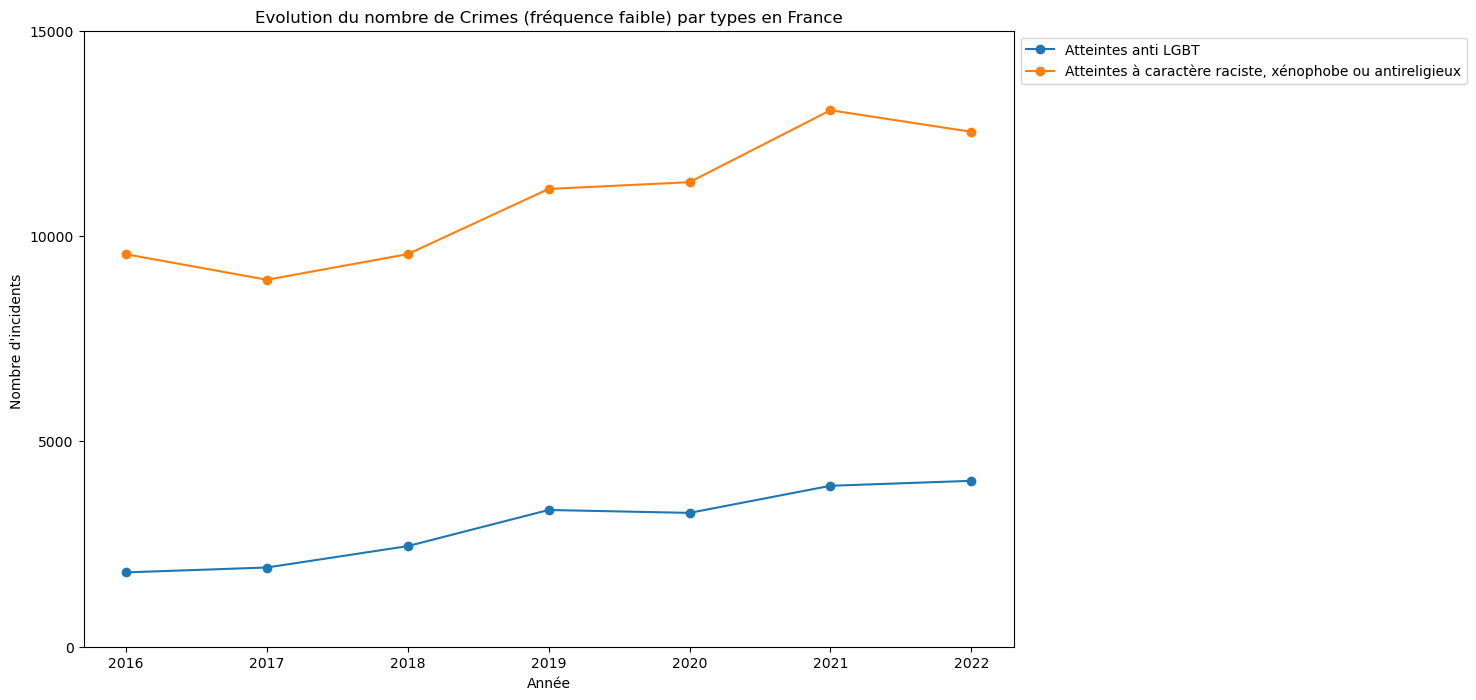

In [164]:
fig, ax = plt.subplots(figsize=(12, 8))

for df in crime3_dataframes:
    label = df['Indicateurs'].iloc[0]  # On se sert du type de crime comme label
    df['Unité de temps'] = pd.to_numeric(df['Unité de temps'], errors='coerce')
    
    df = df.dropna(subset=['Valeurs'])
    
    ax.plot(df['Unité de temps'], df['Valeurs'], label=label, marker='o')

ax.set_title('Evolution du nombre de Crimes (fréquence faible) par types en France')
ax.set_xlabel('Année')
ax.set_ylabel("Nombre d'incidents ")

y_ticks = range(0, int(max(df['Valeurs'])) + 5000, 5000)
ax.set_yticks(y_ticks)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

On constate une progression des atteintes anti-LGBT et à caractère raciste/xénophobe/antireligieux.

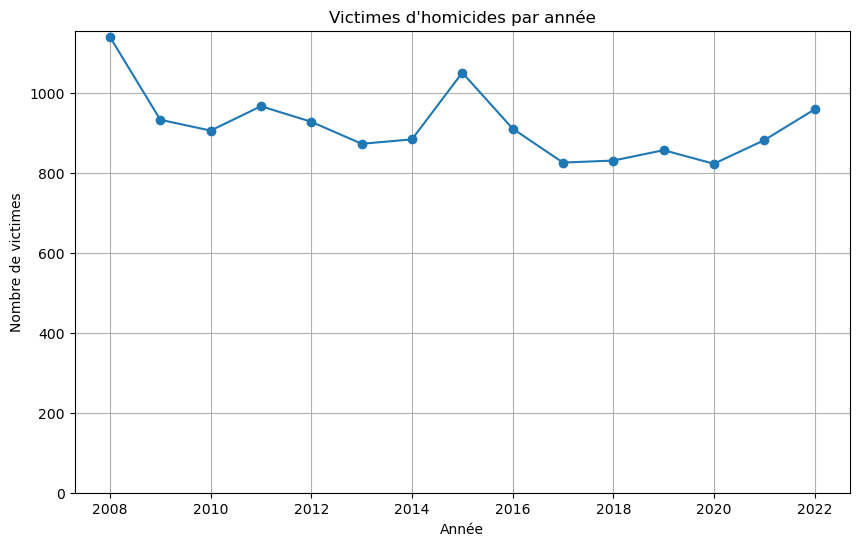

In [98]:
plt.figure(figsize=(10, 6))
plt.plot(data_homi_all['Unité de temps'], data_homi_all['Valeurs'], marker='o', linestyle='-')
plt.title("Victimes d'homicides par année")
plt.ylim(bottom=0)
plt.xlabel('Année')
plt.ylabel('Nombre de victimes')
plt.grid(True)
plt.show()

Les attentats terroristes sont pris en compte, 2015 est donc sureprésentée.
selon la directrice de recherche au CNRS et responsable de l'Observatoire scientifique du crime et de la justice, Renée Zauberman:

"Le service statistique ministériel qui publie ces données a récemment entrepris d'examiner
plus précisément les procédures et d'analyser en quoi consistaient les faits qui étaient déclarés
comme homicides. Cela les a amenés à requalifier certains faits, revoyant ainsi à la baisse
les données. Par exemple pour 2020, le nombre de faits finalement considérés comme homicides
est passé de 997 à 863", explique-t-elle, s'appuyant sur les données publiées par le ministère de l'Intérieur.

Cet ajustement n'a pas encore été fait sur les données de 2021 et 2022

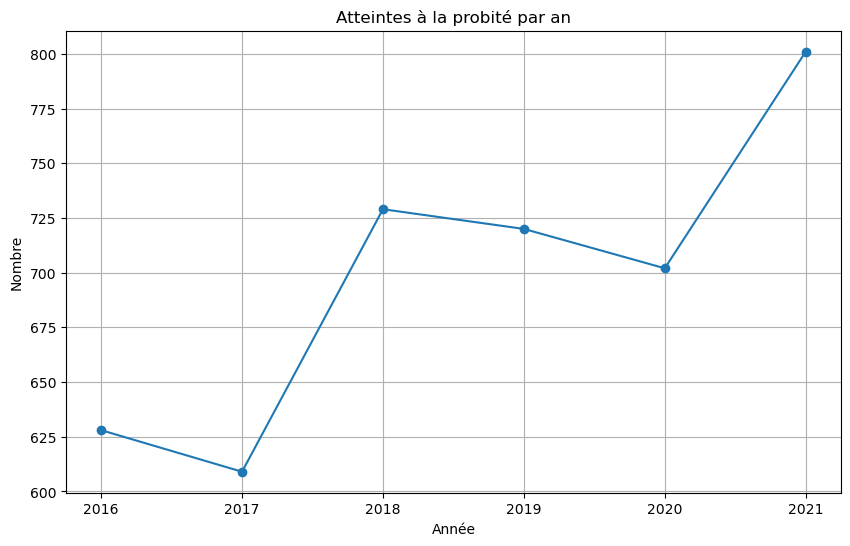

In [165]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(data_corruption['Unité de temps'], data_corruption['Valeurs'], marker='o', linestyle='-')


plt.title("Atteintes à la probité par an")
plt.xlabel('Année')
plt.ylabel('Nombre')
plt.grid(True)
plt.show()


Les atteintes à la probité enregistrées par les services de sécurité regroupent cinq items principaux: corruption, prise illégale d’intérêts, détournement de fonds publics, favoritisme et les autres atteintes à la probité (infractions de recel, de trafic d’influence, de concussion et de blanchiment).

En 2013, un progrès majeur dans ce domaine essentiel a été enregistré,avec la loi permettant aux associations de lue contre la corruption déclarées depuis cinq ans de seconstituer partie civile dans les dossiers d’atteinte à la probité.
Depuis 2017 (élection d'emmanuel Macron) on voit une explosion des atteintes à la probitéLa première étude sur ce sujet est publiée en 2022 par AntiCor, Emmanuel Macron lui-même n’a pas caché son irritation, en accusant Anticor, en février sur France 2,de « faire durer les procédures »,  ajoutant : « Même si les gens à la fin ne sont pas condamnés,vous les foutez en l’air. »

En décembre 2023 le gouvernement n’a pas renouvelé l’agrément de l’association de lutte contre la corruption.
Le retrait de l’agrément d’Anticor l'empêche de se porter partie civile dans des affaires
d’atteinte à la probité. Cela permet au gouvernement de choisir quelle association peut ou non déclencher 
des enquêtes visant certains de ses membres.

https://www.lemonde.fr/idees/article/2023/12/29/lutte-anticorruption-l-executif-ne-peut-etre-juge-et-partie_6208262_3232.html

# Evolution de l'ensemble des Crimes et Délits

Après avoir évalué en détail la progression des différents crimes, je voulais voir dans l'ensemble, quels crimes/Délits avaient le plus porgréssé en pourcentage.
Les données ne couvrent pas les mêmes dates et  je ne voulais pas effectuer d'interpolation linéaire ce qui biaiserai les données.

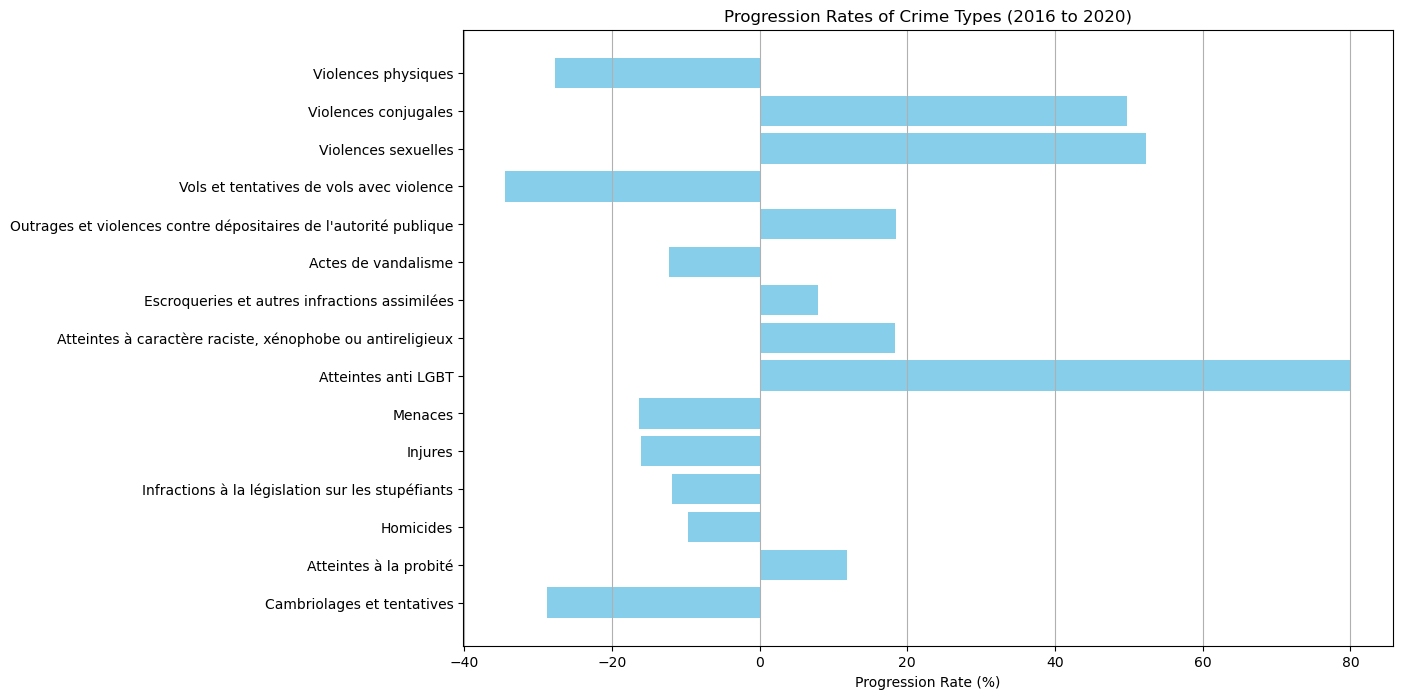

In [166]:
progression_rates = {}

# Calcul de la progression
for df in all_crime_dataframes:
    indicator = df['Indicateurs'].iloc[0]
    values_2016 = df.loc[df['Unité de temps'] == 2016, 'Valeurs'].values[0] if not df.loc[df['Unité de temps'] == 2016].empty else None
    values_2020 = df.loc[df['Unité de temps'] == 2020, 'Valeurs'].values[0] if not df.loc[df['Unité de temps'] == 2020].empty else None

    if values_2016 is not None and values_2020 is not None and values_2016 != 0:
        progression_rate = ((values_2020 - values_2016) / values_2016) * 100
        progression_rates[indicator] = progression_rate

plt.figure(figsize=(12, 8))
plt.barh(list(progression_rates.keys()), list(progression_rates.values()), color='skyblue')
plt.xlabel('Progression Rate (%)')
plt.title('Progression Rates of Crime Types (2016 to 2020)')
plt.grid(axis='x')
plt.show()

On voit donc que les infractions qui ont le plus progréssé sur cette période sont les violences conjugales, les atteintes anti LGBT/racistes,  les outrages, les atteintes à la probité et les escroqueries.

J'aimerai maintenant comparer cette évolution avec le sentiment d'insécurité en france:


In [117]:
data_insecurite_home['Valeurs'] = data_insecurite_home['Valeurs'].interpolate(method='linear', axis=0)
data_insecurite_ville['Valeurs'] = data_insecurite_ville['Valeurs'].interpolate(method='linear', axis=0)
data_insecurite_sortir['Valeurs'] = data_insecurite_sortir['Valeurs'].interpolate(method='linear', axis=0)


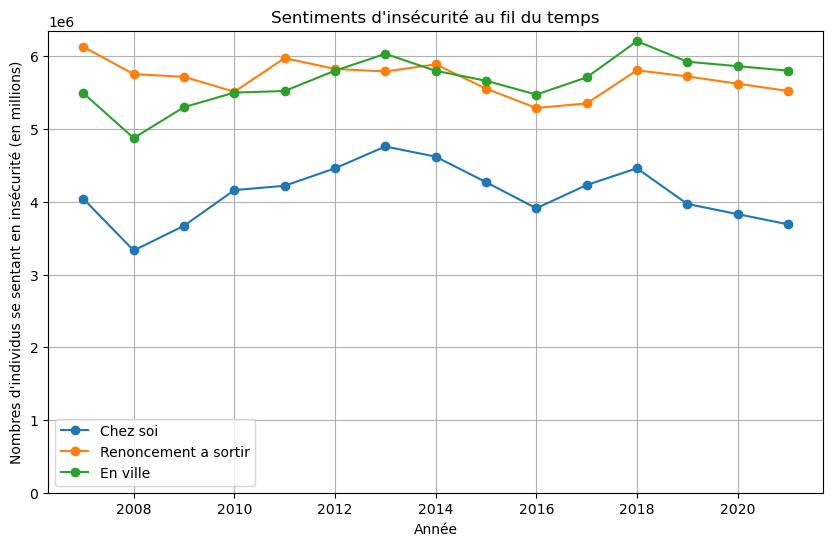

In [102]:
plt.figure(figsize=(10, 6))
plt.plot(data_insecurite_home['Unité de temps'], data_insecurite_home['Valeurs'], marker='o', linestyle='-', label="Chez soi")
plt.plot(data_insecurite_sortir['Unité de temps'], data_insecurite_sortir['Valeurs'], marker='o', linestyle='-', label="Renoncement a sortir")

plt.plot(data_insecurite_ville['Unité de temps'], data_insecurite_ville['Valeurs'], marker='o', linestyle='-', label="En ville")

plt.title("Sentiments d'insécurité au fil du temps")
plt.xlabel('Année')
plt.ylabel("Nombres d'individus se sentant en insécurité (en millions)")
plt.ylim(bottom=0)
plt.grid(True)
plt.legend()  
plt.show()

On remarque qu'entre 2008  et 2020 le sentiment d'insécurité est relativement stable. Cela contredit ce qui était avancé de base par notre élu RN. En réalité l'insécurité est stable, les crimes et délits baissent excéptés:
les violences conjugales, les atteintes anti LGBT/racistes,  les outrages, les atteintes à la probité et les escroqueries.
Cependant ces dernières ne sont pas mises vraiment mises en avant dans les discours politiques et médiatiques
Il est intéressant de comparer cela avec l'évolution du traitement médiatique de l'insécurité et du crime.

https://www.youtube.com/watch?v=ciyd3OzIL5o&t=77s
ACRIMED fait remarquer que le discours de partis d'extreme droite repose sur le fait que :
"Bien que les chiffres de la délinquance soient en baisse il y'a un sentiment d'insécurité"
Nous avons montré que ce n'est pas le cas.
EN 2001 "Fantasmes et réalités dans le débat français, Laurent Mucchielli"
 « Les journalistes ont beau essayer de s’en défendre et de renvoyer toujours la faute sur
le voisin, si "l’insécurité" a pris une telle importance dans le débat public, c’est aussi parce que nos journaux, nos radios et nos télévisions y consacrent une place démesurée. »


Un article du monde daté de 2013, observe la part grandissante de faits divers relayés dans les journaux.
Il se peut qu'en surreprésentant des évènements d'importance moindre, on donnne l'impression qu'ils sont bien plus communs qu'il ne le sont réellement.
"https://www.lemonde.fr/actualite-medias/article/2013/06/17/en-dix-ans-le-nombre-de-faits-divers-dans-les-jt-a-augmente-de-73_3431764_3236.html"

# Lien avec l'Immigration

Maintenant on pourrait s'intéresser à la nationalité des mis en cause, puisque c'est un des arguments anti-immigration qui revient le plus souvent.


In [142]:

data_misencause = pd.read_csv("projet big data/mise_en_cause_natio.csv", sep=",")
data_misencause.columns = ['Nature', 'Distrib Étrangers', 'Distrib Français', 'Part des étrangers', '', '']



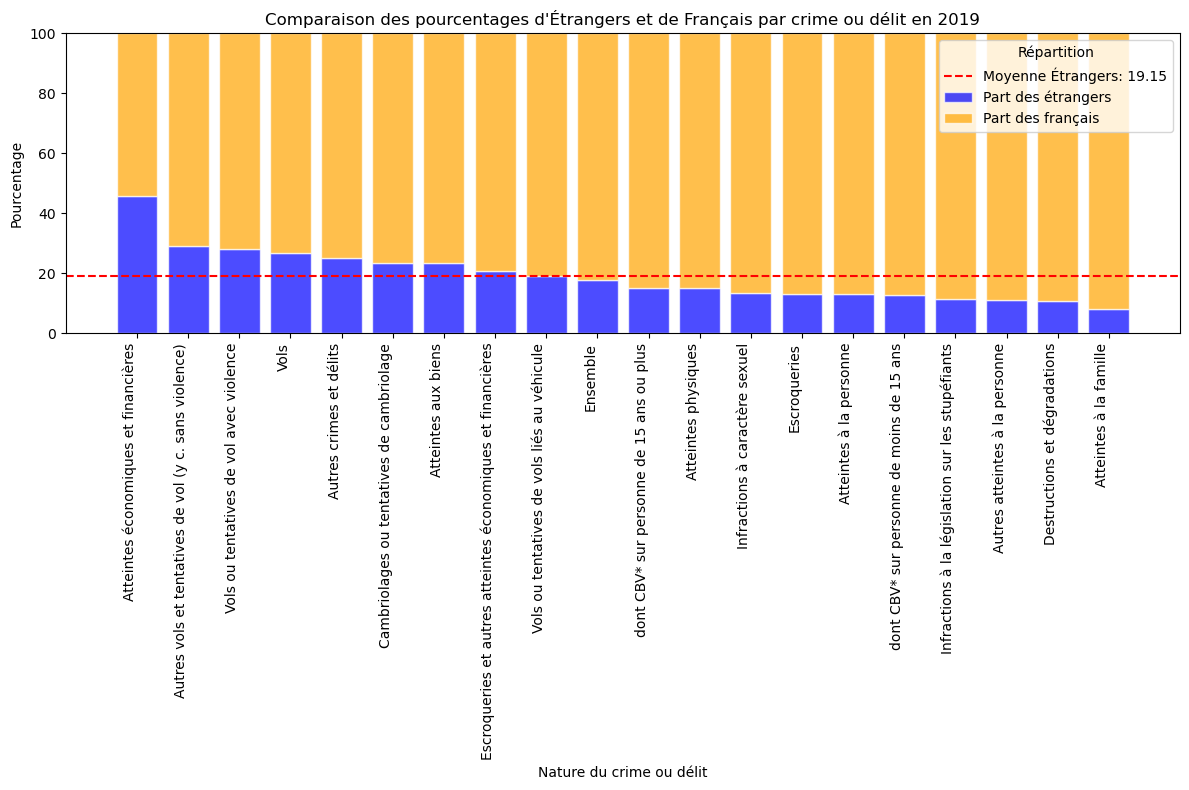

In [144]:
# Convertir les colonnes numériques
data_misencause[['Distrib Étrangers', 'Distrib Français', 'Part des étrangers']] = data_misencause[['Distrib Étrangers', 'Distrib Français', 'Part des étrangers']].apply(pd.to_numeric, errors='coerce')

# Supprimer les lignes avec des valeurs manquantes
data_misencause = data_misencause.dropna(subset=['Part des étrangers'])

# Calculer la Part des Français
data_misencause['Part des Français'] = 100 - data_misencause['Part des étrangers']

# Trier les données par Part des étrangers en ordre décroissant
data_misencause = data_misencause.sort_values(by='Part des étrangers', ascending=False)

average_part_etrangers = data_misencause['Part des étrangers'].mean()
# Tracé du graphique
plt.figure(figsize=(12, 8))

# Barre représentant la Part des étrangers
plt.bar(data_misencause['Nature'], data_misencause['Part des étrangers'], color='blue', label='Part des étrangers', alpha=0.7, edgecolor='white')

# Barre opposée représentant la Part des Français
plt.bar(data_misencause['Nature'], data_misencause['Part des Français'], bottom=data_misencause['Part des étrangers'], color='orange', label='Part des français', alpha=0.7, edgecolor='white')

plt.axhline(y=average_part_etrangers, color='red', linestyle='--', label=f'Moyenne Étrangers: {average_part_etrangers:.2f}')

plt.title("Comparaison des pourcentages d'Étrangers et de Français par crime ou délit en 2019")
plt.xlabel("Nature du crime ou délit")
plt.ylabel('Pourcentage')
plt.ylim(0, 100)
plt.legend(title='Répartition')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()


Les étrangers sont davantage impliqués dans les atteintes économiques et financières, les vols de divers types.
La catégorie "Autre crimes et délits" regroupe entre autres 
les délits en lien avec la législation sur le travail, la législation sur l’entrée et le séjour sur le territoire
Il n'est donc pas surprenant que ces derniers soient sureprésentés
Les Infractions à caractèeres sexuels sont plus communément liés à des français ce qui contredit le discours anti-immagration.
"En 2014, 52% des viols commis à Paris l'ont été par des étrangers", a affirmé Marine Le Pen sur LCI en 2018.



Pour continuer l'analyse, j'ai voulu retirer les catégories qui relevaient de la précarité financière/économique. En effet, plus une personne est précaire, plus il est probable qu'elle ai recours au vol. La période d'inflation importante en 2022 à été accompagnée par une augmentation des vols à l'étalage par exemple.

Les atteintes aux biens :"les appropriations frauduleuses : vol, filouteries, extorsion, chantage, escroquerie…"

In [151]:
# Filtrer les lignes contenant la lettre 'v' ou 'V' dans la colonne 'Nature'
data_misencause2 = data_misencause[~data_misencause['Nature'].str.contains('v|V')]

# Supprimer la ligne avec la valeur "Atteintes économiques et financières"
data_misencause2 = data_misencause2[data_misencause2['Nature'] != 'Atteintes économiques et financières']
data_misencause2 = data_misencause2[data_misencause2['Nature'] != 'Ensemble']
data_misencause2 = data_misencause2[data_misencause2['Nature'] != 'Autres crimes et délits']
data_misencause2 = data_misencause2[data_misencause2['Nature'] != 'Atteintes aux biens']
data_misencause2 = data_misencause2[data_misencause2['Nature'] != 'Escroqueries et autres atteintes économiques et financières']
average_part_etrangers = data_misencause2['Part des étrangers'].mean()

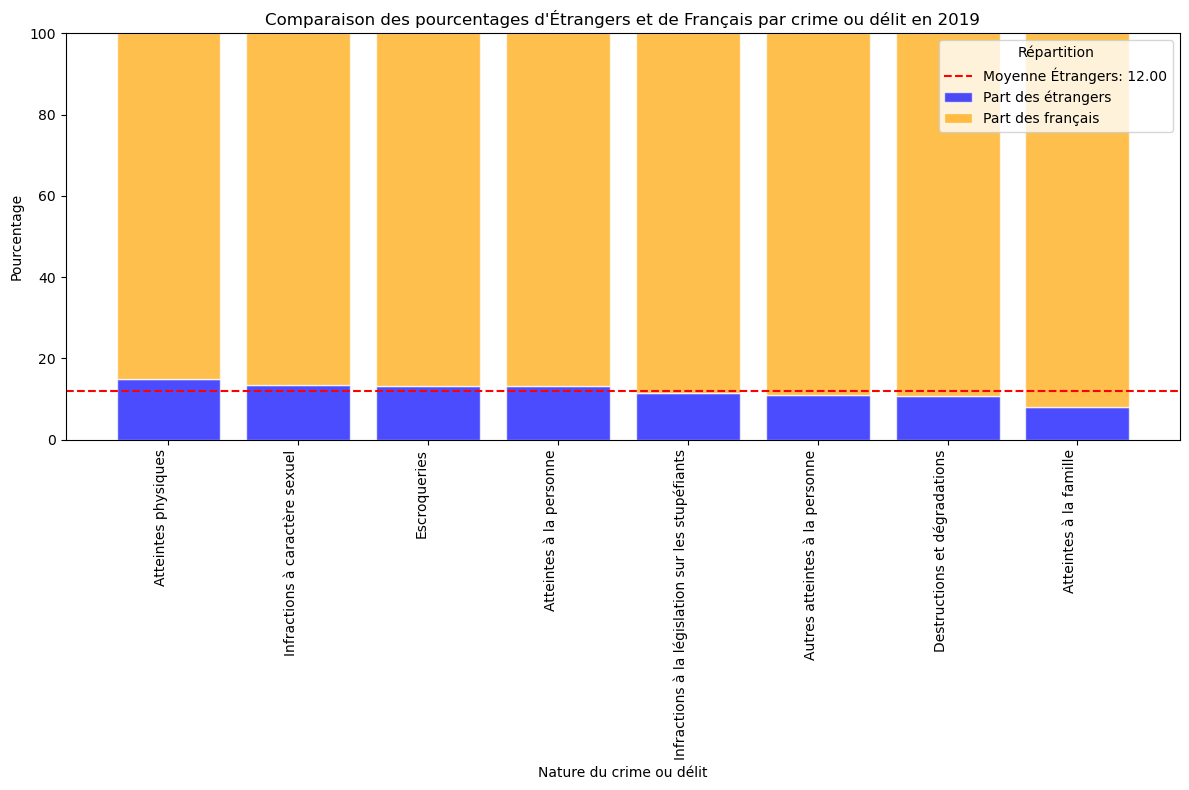

In [152]:


# Tracé du graphique
plt.figure(figsize=(12, 8))

# Barre représentant la Part des étrangers
plt.bar(data_misencause2['Nature'], data_misencause2['Part des étrangers'], color='blue', label='Part des étrangers', alpha=0.7, edgecolor='white')

# Barre opposée représentant la Part des Français
plt.bar(data_misencause2['Nature'], data_misencause2['Part des Français'], bottom=data_misencause2['Part des étrangers'], color='orange', label='Part des français', alpha=0.7, edgecolor='white')

plt.axhline(y=average_part_etrangers, color='red', linestyle='--', label=f'Moyenne Étrangers: {average_part_etrangers:.2f}')
plt.title("Comparaison des pourcentages d'Étrangers et de Français par crime ou délit en 2019")
plt.xlabel("Nature du crime ou délit")
plt.ylabel('Pourcentage')
plt.ylim(0, 100)
plt.legend(title='Répartition')

# Rotation des étiquettes sur l'axe x
plt.xticks(rotation=90, ha='right')

plt.tight_layout()
plt.show()


La population étrangère vivant en France s'élève à 5,3 millions de personnes, soit 7,8 % de la population totale (INSEE, https://www.insee.fr/fr/statistiques/3633212)

Avec une moyenne de 12% sur les crimes et délits non reliés à la précarité, il y a donc une surreprésentation des étrangers parmis les mis en cause.

On appelle mis en cause, toute personne ayant été entendue par la police ou la gendarmerie et à l'encontre de laquelle sont réunis, dans la procédure transmise au parquet, des éléments graves et concordant attestant qu'elle a commis ou tenté de commettre un ou plusieurs délits ou crimes.

Ces chiffres doivent être mis en perspective, tout comme toute l'analyse de ce projet. Les données sont celles des mis en cause, si les forces de l'ordre sont plus propices à arrêter certains profils, les données seront biaisées.

En 2023, le Comité pour l'élimination de la discrimination raciale relevant de l'Onu a pointé la discrimination structurelle au sein des forces de l’ordre en France. 

Le musée de l'histoire de l'immigration (https://www.histoire-immigration.fr/societe-et-immigration/y-a-t-il-un-lien-entre-delinquance-et-immigration) publie un article qui vise à nuancer les résultats de ces études. 

"Les immigrés (dont les étrangers) et leurs descendants sont surtout présents dans les types de délinquance qui sont typiquement celles des milieux populaires, mais qui sont également les formes de délinquance les plus visibles, les plus simples et donc les plus réprimées par la police et la justice" (Institut convergences migrations).

"Le calcul de la part des étrangers dans la délinquance additionne tous les étrangers condamnés ou mis en cause, qu’ils soient légalement installés en France, en transit ou sans papiers. Or, seuls les premiers sont comptabilisés dans les 5,8% d’étrangers en France. Un calcul exact de la représentativité des étrangers dans la délinquance ne devrait tenir compte que de la proportion des étrangers légaux par rapport au reste de la population et exclure les étrangers en transit ou en situation irrégulière. Par ailleurs, une même personne peut être interpellée plusieurs fois pour le même délit notamment dans les cas de vols ou de consommation de drogue."

"Pour des infractions identiques, la justice condamne plus sévèrement des délinquants étrangers que des délinquants français. Ainsi, sont-ils plus souvent placés en détention provisoire ou en garde à vue. Or, pour un même délit, les prévenus qui se présentent libres au tribunal seraient moins durement condamnés."

"Ainsi les statistiques ne disent rien en soi, si on ne fait pas l’effort d’en préciser dans le détail parfois les éléments constitutifs (quelles infractions, quelle dynamique etc.) et si on omet de les mettre en corrélation avec d’autres éléments, comme ici l’impact des discriminations sur les mécanismes et les destinées judiciaires."